# Introduction to Feedforward Neural Networks

After this lecture you should:
* know what a neural network is
* understand its basic building blocks
* understand why we need non-linearities
* connect different views on neural networks

A neural network is a computational model that has slightly different meanings in different communitites.

* **Cognitive science view**: a computational model of the brain consisting of artificial neural perceptrons
* **Machine Learning view**: 
   * **Linear algebra view**: a network of perceptron-like nodes, i.e., a set of matrix multiplication operations
   * **Graph theory view**: a computational graph model (with automatic differentiation)


As the name already suggests, a neural network is a network. It can be seen as a model that is build up from basic building blocks. Lets first look at one such building block, for instance, a single perceptron. 

<img src="pics/lego.jpg" width=300>

## From biological neurons to artificial neural networks

To get started, I will first introduce a type of artificial neuron the **perceptron**. It was introduced with the well-known perceptron algorithm by Rosenblatt (1957), inspired by earlier work on McCulloch-Pitts to model neurons in the brain. In layman's terms, a neuron gets information through dendrites and if enough information is accumulated the neuron 'fires' and sends information down the axon: 

<img src="pics/neuron.jpg" width="350">

<img src="pics/neuron-simple.png" width="350">

Thus neural networks are biologically inspired. (But it's overly simplistic..)

### How does the perceptron work?
The basic perceptron gets $n$ **inputs** $x_1,..,x_n$ and produces an **output** $y$. It does so by **weighting** the inputs by $w_1,..,w_n$, sums up the weighted intputs and sends this weighted sum through an **activation function** $\sigma$ to see if the neuron "fires". That is, if the weighted sum is above a **threshold** the output will be 1, otherwise 0.

Mathematically, the perceptron is formulated as: 

$y = \sigma(\sum_{j=1}^n w_{j} x_j )$

We can visualize the perceptron as (for a given perceptron node $k$): <img src="pics/perceptron.png" width=400> 

## What is $\sigma$?

In the perceptron $\sigma$ is a **threshold** function. Intuitively, the perceptron only fires if the weighted sum is above a given threshold. We can formulate this intuition as:


$$\begin{equation}
    y=
    \begin{cases}
      1 & \text{if} (\sum_j w_j x_j) > threshold\\
      0 & \text{otherwise}\\
    \end{cases}
  \end{equation}$$
  


Let's rewrite the equation of the perceptron. First, notice that $\sum_{j=1} w_{j} x_j $ is the **dot product** of the weights and input, and can be written as: 

$$\sum_{j=1} w_{j} x_j = \vec{w} \cdot \vec{x}$$ where $\vec{w}$ and $\vec{x}$ are now vectors. If it is clear from the context then we avoid the explicit vector notation and simply write $w \cdot x$. 

Second, we will move the threshold inside the equation by introducing $b$ the bias term $b=-threshold$. Using these two changes, the equation rewrites as:

$$\begin{equation}
    y=
    \begin{cases}
      1 & \text{if} (w \cdot x + b) > 0)\\
      0 & \text{otherwise}\\
    \end{cases}
  \end{equation}$$

### Example
Suppose we have a perceptron with two inputs, weights -2 and -2 and bias term 3. This is illustrated as: <img src="pics/nand-graph.png">
What function does this perceptron compute? 

In [3]:
def compute(x1, x2):
    a = x1*-2 + x2*-2 + 1 * 3
    if a > 0:
        return 1
    else:
        return 0
x1=0
x2=1
print(compute(x1,x2))

1


### Vectorization
Instead of this cumbersome notation, let's use vectorization. Now we represent our input instances as vectors, and the entire data as a matrix. Also the weights are a vector.

In [7]:
import numpy as np
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
def compute(input_matrix):
    W = [-2,-2]
    b = 3
    a = np.dot(input_matrix,W) + b
    return [1 if elem > 0 else 0 for elem in a]
labels=compute(inputs)
print(labels)

[1, 1, 1, 0]


Beautiful! Now we have a perceptron that models the NAND logical function. That is, it returns 0 only if both inputs are active (not AND).

### Visualization

We can visualize the example by looking at where the input vectors are in the space and which label they get. 

<img src="pics/nand-plot.png">

**Exercise (try at home):** try to manually modify the parameters (the weights and bias) of the little perceptron network. Can you get another logical function? 

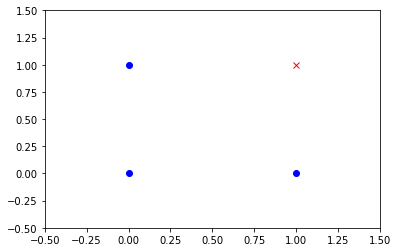

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
colors=['r','b']
types=['x','o']
for i, lab in enumerate(labels):
    plt.plot(inputs[i,0], inputs[i,1], types[lab], color=colors[lab])
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.show()

Recall the perceptron formula, what does it resemble?

$$\begin{equation}
    y=
    \begin{cases}
      1 & \text{if} (w \cdot x + b) > 0)\\
      0 & \text{otherwise}\\
    \end{cases}
  \end{equation}$$

Right, it's the equation of a line! To be precise, since the inputs have usually more than 2 dimensions it is actually a **hyperplane**. Try to imagine the line in our NAND example.


### Linear separability

The perceptron is a **linear** classifier. Now this should be clear from the formula.

#### Linearly separable?
How have a look at the following two examples. Are they linearly separable? (hint: which logical functions do they represent?) 
<img src="pics/linearq.png">


left: OR, right: XOR

Right. And this is a limitation of the perceptron. If the data is not linearly separable, the perceptron has a hard time. So what can we do about it? There are tricks to make the perceptron work in such cases, but usually you will move to a model with higher **representational capacity**.

<img src="pics/separability.png">

# Why Neural Networks

* **non-linearity**
* **representational power** (can represent any function)

## What is a Neural Network

A neural network is a network of nodes. It has **input** nodes, **output node(s)** and usually **hidden nodes**.



Below is a visualization of a neural network. The green nodes are the inputs, the blue nodes are **hidden nodes** and the last *layer* is the **output** layer. How many input, hidden and output nodes does this network have?

A feedforward neural network:
<img src="pics/nn.png"> 

Or another visualization (this one with 2 hidden layers): <img src="http://neuralnetworksanddeeplearning.com/images/tikz11.png">

Such a basic neural network is also called:
* **feedforward neural network**
* **multi-layer perceptron** (MLP) (for some odd historical reasons)



Lets look at a more detailed example. The network  can be formulated as:
<img src="pics/nn.png" width=300> 

$$NN_{MLP1}(\mathbf{x})=g(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2}$$

there $g$ is a non-linearity/activation function. We will come back to this later. For now, discuss with your neighbor: what are all the terms in the formula above, and how can you connect them to the picture above?

A feedforward neural network with 2 hidden layers:
$$NN_{MLP2}(\mathbf{x})=g^2(g^1(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2})\mathbf{W^3}+\mathbf{b^3}$$


The MLP2 is illustrated here (vertically). 
<img src="pics/nn_vertical.png" width=300>
It is a bit cumbersome to see, so let's break the formula 

$$NN_{MLP2}(\mathbf{x})=g^2(g^1(\mathbf{xW^1+b^1})\mathbf{W^2}+\mathbf{b^2})\mathbf{W^3}+\mathbf{b^3}$$

down into parts:


$$\mathbf{h^1}=g^1(\mathbf{xW^1+b^1})$$
$$\mathbf{h^2}=g^2(\mathbf{h_1W^2+b^2})$$
$$NN_{MLP2}(\mathbf{x})= \mathbf{h^2}\mathbf{W^3}+\mathbf{b^3}$$

In [ ]:
## Notes on vector/matrix sizes:
## x: 1x4 vector
## W1: 4x6 matrix
## b1: 1x6 vector 
## -> h1: 1x6   # first layer transforms 4 dimensional input into 6 dimensional vector, etc
## W2: 6x5 matrix
## b2: 1x5 vector 
## -> h2: 1x5
## W3: 5x3 matrix
## b3: 1x3 vector
## -> output: 1x3

Voila! Now we have a wonderful description of a neural network, both graphically and algebraically.

### References
* More details in [Michael Nielsen's book chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html)
* Yoav Goldberg's tutorial: [A Primer on Neural Network Models for Natural Language Processing](http://arxiv.org/abs/1510.00726)